In [6]:
import numpy as np
import pandas as pd
from sklearn.neighbors import KNeighborsClassifier
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler


# Load the dataset
df = pd.read_csv('diabetes.csv')

# Separate features and target
X = df.drop('Outcome', axis=1)
y = df['Outcome']

# Split the data into two classes (0 and 1)
class_0 = X[y == 0]
class_1 = X[y == 1]

# Calculate the mean (centroid) for each class
centroid_0 = class_0.mean(axis=0)
centroid_1 = class_1.mean(axis=0)

# Calculate the spread (standard deviation) for each class
std_0 = class_0.std(axis=0)
std_1 = class_1.std(axis=0)

# Calculate the distance between the mean vectors of the two classes
interclass_distance = np.linalg.norm(centroid_0 - centroid_1)




# Output the results
print("Centroid for Class 0 (No Diabetes):\n", centroid_0)
print("\nCentroid for Class 1 (Diabetes):\n", centroid_1)
print("\nStandard Deviation for Class 0 (No Diabetes):\n", std_0)
print("\nStandard Deviation for Class 1 (Diabetes):\n", std_1)
print("\nInterclass Distance between Class 0 and Class 1:\n", interclass_distance)

Centroid for Class 0 (No Diabetes):
 Pregnancies                   3.298000
Glucose                     109.980000
BloodPressure                68.184000
SkinThickness                19.664000
Insulin                      68.792000
BMI                          30.304200
DiabetesPedigreeFunction      0.429734
Age                          31.190000
dtype: float64

Centroid for Class 1 (Diabetes):
 Pregnancies                   4.865672
Glucose                     141.257463
BloodPressure                70.824627
SkinThickness                22.164179
Insulin                     100.335821
BMI                          35.142537
DiabetesPedigreeFunction      0.550500
Age                          37.067164
dtype: float64

Standard Deviation for Class 0 (No Diabetes):
 Pregnancies                  3.017185
Glucose                     26.141200
BloodPressure               18.063075
SkinThickness               14.889947
Insulin                     98.865289
BMI                          7.68985

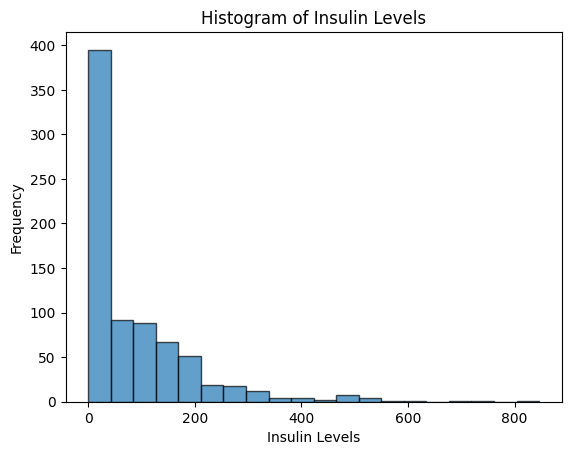

Mean of Insulin: 79.80
Variance of Insulin: 13263.89


In [7]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

# Load the dataset
df = pd.read_csv("diabetes.csv")  # Ensure the correct file path

# Select the "Insulin" column
insulin_data = df["Insulin"].dropna()  # Drop missing values if any

# Plot histogram
plt.hist(insulin_data, bins=20, edgecolor="black", alpha=0.7)
plt.xlabel("Insulin Levels")
plt.ylabel("Frequency")
plt.title("Histogram of Insulin Levels")
plt.show()

# Calculate mean and variance
mean_insulin = np.mean(insulin_data)
variance_insulin = np.var(insulin_data)

print(f"Mean of Insulin: {mean_insulin:.2f}")
print(f"Variance of Insulin: {variance_insulin:.2f}")


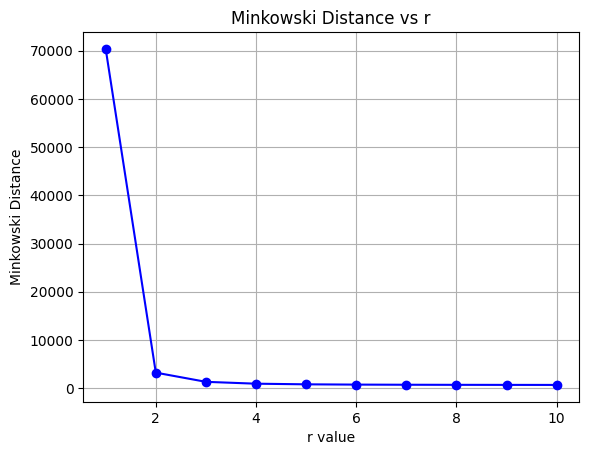

In [8]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from scipy.spatial.distance import minkowski

# Load the dataset
df = pd.read_csv("diabetes.csv")  # Ensure the correct file path

# Select two feature vectors (e.g., "Glucose" and "Insulin")
x = df["Glucose"].dropna().values
y = df["Insulin"].dropna().values

# Ensure both vectors have the same length
min_length = min(len(x), len(y))
x, y = x[:min_length], y[:min_length]

# Compute Minkowski distance for r = 1 to 10
r_values = range(1, 11)
distances = [minkowski(x, y, r) for r in r_values]

# Plot the results
plt.plot(r_values, distances, marker='o', linestyle='-', color='b')
plt.xlabel("r value")
plt.ylabel("Minkowski Distance")
plt.title("Minkowski Distance vs r")
plt.grid(True)
plt.show()


In [9]:
import pandas as pd
import numpy as np
from sklearn.model_selection import train_test_split

# Load the dataset
df = pd.read_csv("diabetes.csv")  # Ensure the correct file path

# Select feature vectors (X) and class labels (y)
X = df.drop(columns=["Outcome"])  # Assuming "Outcome" is the target class column
y = df["Outcome"]

# Ensure binary classification
if len(np.unique(y)) > 2:
    df = df[df["Outcome"].isin([0, 1])]  # Keeping only two classes (0 and 1)
    X = df.drop(columns=["Outcome"])
    y = df["Outcome"]

# Split the dataset into 70% train and 30% test
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)

# Print dataset sizes
print(f"Training set size: {X_train.shape}, Testing set size: {X_test.shape}")


Training set size: (537, 8), Testing set size: (231, 8)


In [10]:
import pandas as pd
import numpy as np
from sklearn.model_selection import train_test_split
from sklearn.neighbors import KNeighborsClassifier
from sklearn.metrics import accuracy_score

# Load the dataset
df = pd.read_csv("diabetes.csv")  # Ensure the correct file path

# Select feature vectors (X) and class labels (y)
X = df.drop(columns=["Outcome"])  # Assuming "Outcome" is the target class column
y = df["Outcome"]

# Split the dataset into 70% train and 30% test
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)

# Train a kNN classifier with k=3
knn = KNeighborsClassifier(n_neighbors=3)
knn.fit(X_train, y_train)

# Make predictions on the test set
y_pred = knn.predict(X_test)

# Evaluate model performance
accuracy = accuracy_score(y_test, y_pred)
print(f"Accuracy of kNN model (k=3): {accuracy:.2f}")


Accuracy of kNN model (k=3): 0.68


In [12]:
import pandas as pd
import numpy as np
from sklearn.model_selection import train_test_split
from sklearn.neighbors import KNeighborsClassifier

# Load the dataset
df = pd.read_csv("diabetes.csv")  # Ensure the correct file path

# Select feature vectors (X) and class labels (y)
X = df.drop(columns=["Outcome"])  # Assuming "Outcome" is the target class column
y = df["Outcome"]

# Split the dataset into 70% train and 30% test
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)

# Train a kNN classifier with k=3
knn = KNeighborsClassifier(n_neighbors=3)
knn.fit(X_train, y_train)

# Predict labels for the entire test set
y_pred = knn.predict(X_test)
print("Predicted labels for test set:")
print(y_pred[:10])  # Display first 10 predictions

# Predict class for a single test vector
test_vect = X_test.iloc[0].values.reshape(1, -1)  # Select first test vector
predicted_class = knn.predict(test_vect)
print(f"\nPredicted class for the first test vector: {predicted_class[0]}")


Predicted labels for test set:
[0 1 0 1 1 1 0 0 1 1]

Predicted class for the first test vector: 0


/usr/local/lib/python3.11/dist-packages/sklearn/utils/validation.py:2739: UserWarning: X does not have valid feature names, but KNeighborsClassifier was fitted with feature names
  warnings.warn(


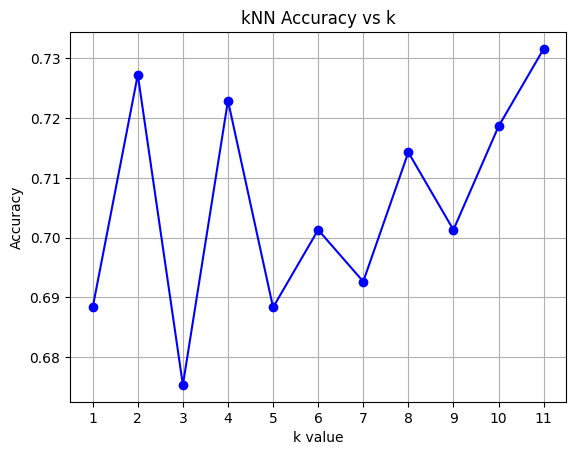

Accuracy for k=1 (NN classifier): 0.69
Accuracy for k=3 (kNN classifier): 0.68


In [13]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.neighbors import KNeighborsClassifier

# Load the dataset
df = pd.read_csv("diabetes.csv")  # Ensure the correct file path

# Select feature vectors (X) and class labels (y)
X = df.drop(columns=["Outcome"])  # Assuming "Outcome" is the target class column
y = df["Outcome"]

# Split the dataset into 70% train and 30% test
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)

# Try k values from 1 to 11
k_values = range(1, 12)
accuracies = []

for k in k_values:
    knn = KNeighborsClassifier(n_neighbors=k)
    knn.fit(X_train, y_train)
    accuracy = knn.score(X_test, y_test)  # Compute accuracy
    accuracies.append(accuracy)

# Plot accuracy vs k
plt.plot(k_values, accuracies, marker='o', linestyle='-', color='b')
plt.xlabel("k value")
plt.ylabel("Accuracy")
plt.title("kNN Accuracy vs k")
plt.xticks(range(1, 12))
plt.grid(True)
plt.show()

# Print accuracies for k=1 and k=3
print(f"Accuracy for k=1 (NN classifier): {accuracies[0]:.2f}")
print(f"Accuracy for k=3 (kNN classifier): {accuracies[2]:.2f}")


In [14]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.neighbors import KNeighborsClassifier
from sklearn.metrics import confusion_matrix, classification_report

# Load the dataset
df = pd.read_csv("diabetes.csv")  # Ensure the correct file path

# Select feature vectors (X) and class labels (y)
X = df.drop(columns=["Outcome"])  # Assuming "Outcome" is the target class column
y = df["Outcome"]

# Split the dataset into 70% train and 30% test
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)

# Train kNN classifier with k=3
knn = KNeighborsClassifier(n_neighbors=3)
knn.fit(X_train, y_train)

# Predict labels for training and test sets
y_train_pred = knn.predict(X_train)
y_test_pred = knn.predict(X_test)

# Compute confusion matrices
conf_matrix_train = confusion_matrix(y_train, y_train_pred)
conf_matrix_test = confusion_matrix(y_test, y_test_pred)

# Print confusion matrices
print("Confusion Matrix - Training Set:\n", conf_matrix_train)
print("\nConfusion Matrix - Test Set:\n", conf_matrix_test)

# Compute classification report (precision, recall, F1-score)
train_report = classification_report(y_train, y_train_pred)
test_report = classification_report(y_test, y_test_pred)

print("\nClassification Report - Training Set:\n", train_report)
print("\nClassification Report - Test Set:\n", test_report)


Confusion Matrix - Training Set:
 [[316  33]
 [ 51 137]]

Confusion Matrix - Test Set:
 [[108  43]
 [ 32  48]]

Classification Report - Training Set:
               precision    recall  f1-score   support

           0       0.86      0.91      0.88       349
           1       0.81      0.73      0.77       188

    accuracy                           0.84       537
   macro avg       0.83      0.82      0.82       537
weighted avg       0.84      0.84      0.84       537


Classification Report - Test Set:
               precision    recall  f1-score   support

           0       0.77      0.72      0.74       151
           1       0.53      0.60      0.56        80

    accuracy                           0.68       231
   macro avg       0.65      0.66      0.65       231
weighted avg       0.69      0.68      0.68       231

